<a href="https://colab.research.google.com/github/MKastek/time-series-notes/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly detection  

- **What is anomaly**?  
An anomaly is “an observation which deviates so much from other observations as to arouse suspicions that it was generated by a different mechanism.” (Hawkings 1980)  

- **What is anomaly**?  
Anomalies are a subset of outliers (Aggarwal 2013)  
All observations = normal data + outliers  
Outliers = noise + anomalies  
Noise = uninteresting outliers  
Anomaly = sufficiently interesting outlier  


**Types of anomalies**  
- **Point anomalies**:  
an individual data point seems strange when compared with the rest of the data.
- **Contextual anomalies**:  
the data seems strange in a specific context, but not otherwise.  
- **Collective anomalies**:  
a collection of data points seems strange when compared with entire dataset, although each point may be OK.  

**Anomaly detection**
- Create a model for what normal data should look like
- Calculate a score for each data point that measures how far from normal it is
- If score is above a previously specified threshold, classify point as an anomaly

## Review of probability and statistics  
**Probability distribution**
- The chance of obtaining a data value (or range of values).
- The normal (Gaussian) distribution is the probability distribution most commonly used to model data.

**Cumulative distribution function (CDF)**
- For a real-valued random variable X, the CDF evaluated at x is the probability that X will take a value less than or equal to x.
- Usually denoted as F(x) with four basic properties:
$$
0 <= F(x) <=1 \;for\;all\;x  \\
\lim_{x \to -\inf} F(x) = 0 \\
\lim_{x \to +\inf} F(x) = 1 \\
F(x) \; is \; a \; non-decreasing \;function \; of \; x
$$

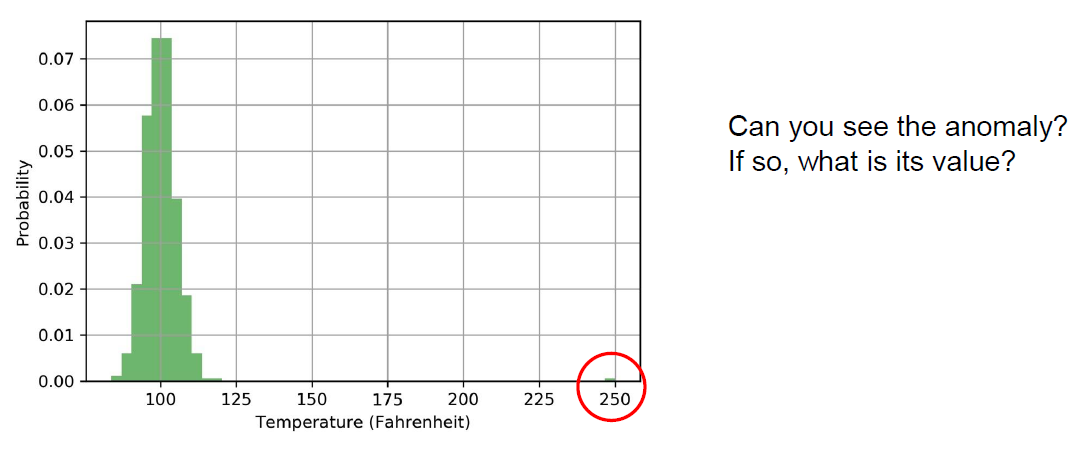

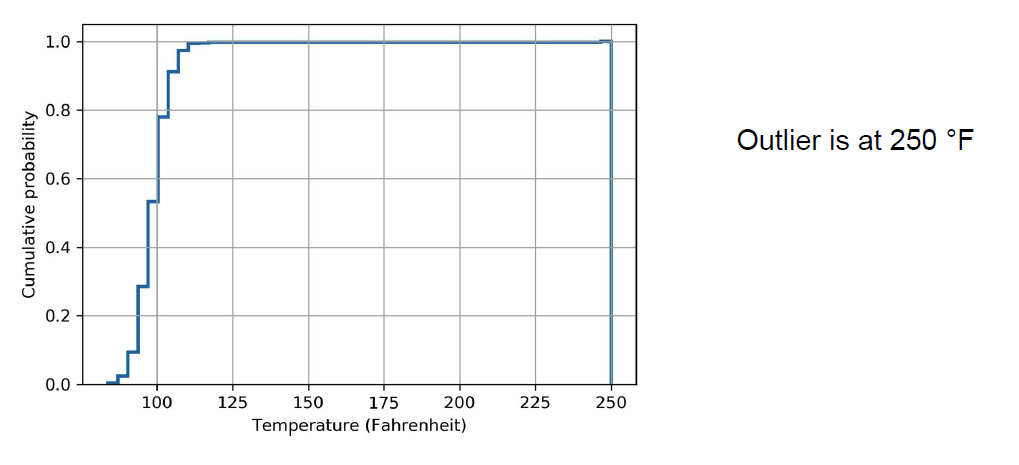

# Statistics fundamental

## Mean  
- Mean - expected value
- For a discrete random variable $X$ that can assume values $x_1, x_2, ... x_n$ it is given by:
$$
\mu = E[X] = \sum_{i=1}^{n}x_{i}p(x_{i})
$$
Where $p(x_{i})$ is the probability of getting outcome $x_{i}$ where $i = 1,2,..n$

## Median
- Median is the value sperating the higher half and lower half of the data

## Mode
- Mode is the value that appears most often  

## Variance  
- Variance is the spread of the data about the mean. The expected value of the square of the deviation of a random variable from its mean.
- For a discret random variable:
$$
var(X) = \sigma^{2}=E[(X-E[X])^2]=\sum^{n}_{i=1}(x_{i}-\mu)^{2}p(x_{i})
$$
Here $\sigma$ is the standard deviation. It is used frequently is anomaly detection.   
The value of $\sigma$ is sensitive to the presence of anomalies.

## Covariance  
- Covariance measures the joint variability of two random variables:
$$
cov(X,Y)=E[(X-E[X])(Y-E[Y])]=E[XY]-E[X]E[Y]
$$
- The covariance of a variable with itself is just the variance:
$$
cov(X,X)=var(X)
$$

## Scoring anomalies
A common method for scoring anomalies in 1D data is the z-score, if the mean and standard deviation are known, then for each data point calculate the z-score as:
$$
z_{i} = \frac{x_{i}-\mu}{\sigma}
$$
The z-score measures how far a point is away from the mean as signes multiple of the standard deviation.
- Large absolute values of the z-score suggest an anomaly.